In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
%cd ..

/home/mathias/work/dphil/deep-ltl


/home/mathias/miniforge3/envs/deepltl/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
def smooth(row, radius):
    """
    Computes the moving average over the given row of data. Returns an array of the same shape as the original row.
    """
    y = np.ones(radius)
    z = np.ones(len(row))
    return np.convolve(row, y, 'same') / np.convolve(z, y, 'same')

In [17]:
def process_logs(experiment):
    df = pd.read_csv(f'storage/{experiment}/train/log.csv')
    df['alg'] = experiment
    df['smooth'] = smooth(df['return_mean'], 10)
    return df

In [18]:
exp = 'fixed_random_neg'
seeds = [0, 2]
df = pd.concat([process_logs(exp) for exp in [f'{exp}_{seed}' for seed in seeds]])
# df['return_smooth'] = smooth(df['return_mean'], 10)


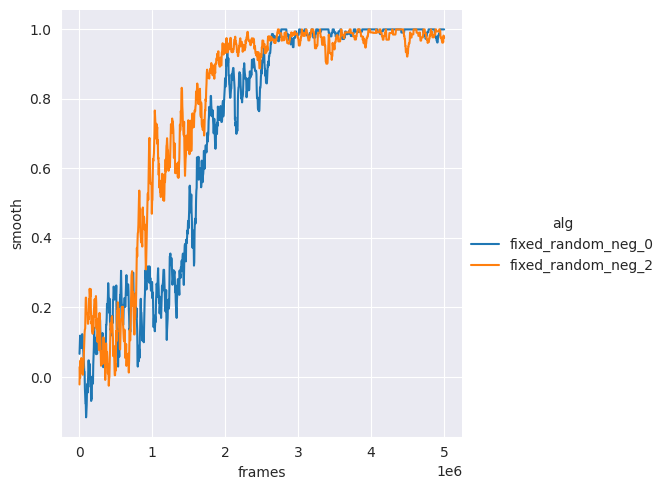

In [20]:
sns.relplot(df, x='frames', y='smooth', kind='line', hue='alg')

In [15]:
df

,update,frames,FPS,duration,rreturn_mean,rreturn_std,rreturn_min,rreturn_max,average_reward_per_step,average_discounted_return,...,value,policy_loss,value_loss,grad_norm,return_mean,return_std,return_min,return_max,alg,smooth
0,1,4096,1331.387219,3,-1.0,0.0,-1.0,-1.0,-0.001218,-1.936618e-01,...,0.482597,0.027528,0.007966,0.113274,-1.0,0.0,-1.0,-1.0,big_refactor0,-0.466667
1,2,8192,1335.195356,6,-1.0,0.0,-1.0,-1.0,-0.000137,-4.346809e-07,...,0.434991,0.023399,0.005054,0.075968,-1.0,0.0,-1.0,-1.0,big_refactor0,-0.477124
2,3,12288,1767.382429,8,-1.0,0.0,-1.0,-1.0,-0.000137,-4.346809e-07,...,-0.095042,-0.004368,0.000281,0.024253,-1.0,0.0,-1.0,-1.0,big_refactor0,-0.487179
3,4,16384,1756.548785,10,-1.0,0.0,-1.0,-1.0,-0.000137,-4.346809e-07,...,-0.093647,-0.003302,0.000199,0.013425,-1.0,0.0,-1.0,-1.0,big_refactor0,-0.496855
4,5,20480,1750.170631,13,-1.0,0.0,-1.0,-1.0,-0.000137,-4.346809e-07,...,-0.088611,-0.003491,0.000150,0.011676,-1.0,0.0,-1.0,-1.0,big_refactor0,-0.506173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,1217,4984832,1765.230488,4061,1.0,0.0,1.0,1.0,0.003125,5.280106e-01,...,0.160783,0.006105,0.000097,0.015446,1.0,0.0,1.0,1.0,big_refactor_no_penalty,0.520606
1217,1218,4988928,1765.904199,4063,1.0,0.0,1.0,1.0,0.003125,5.280106e-01,...,0.148207,0.005939,0.000053,0.016549,1.0,0.0,1.0,1.0,big_refactor_no_penalty,0.530247
1218,1219,4993024,1765.100269,4066,1.0,0.0,1.0,1.0,0.003125,5.280106e-01,...,0.114761,0.004540,0.000031,0.014192,1.0,0.0,1.0,1.0,big_refactor_no_penalty,0.530818
1219,1220,4997120,1336.490513,4069,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,...,0.096873,0.003702,0.000112,0.005445,0.0,0.0,0.0,0.0,big_refactor_no_penalty,0.521795


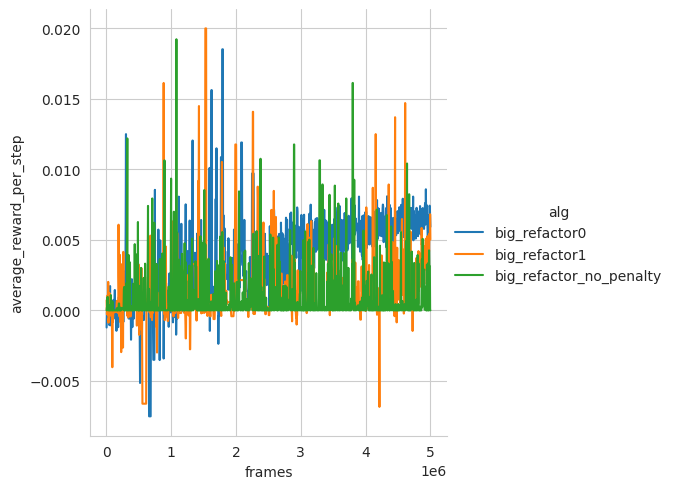

In [13]:
sns.relplot(df, x='frames', y='average_reward_per_step', kind='line', hue='alg')

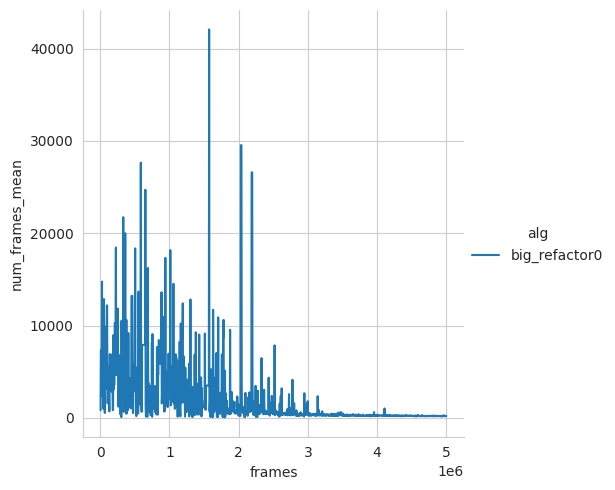

In [16]:
sns.relplot(df[df['alg'] =='big_refactor0'], x='frames', y='num_frames_mean', kind='line', hue='alg')